In [19]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper")

In [25]:
(scores_file, plot_file) = ((snakemake.input[0], snakemake.output[0]) if "snakemake" in globals()
                            else ("results/front-eval/scores.csv",  "results/plots/front-eval-plot.pdf"))

In [26]:
plot_data = pd.melt(pd.read_csv(scores_file), id_vars=["sample", "rate", "dir"], var_name="metric")
plot_data

,sample,rate,dir,metric,value
0,0000_00,5ms,in,pearsonr,0.157673
1,0000_00,5ms,out,pearsonr,0.669004
2,0000_00,25ms,in,pearsonr,0.327531
3,0000_00,25ms,out,pearsonr,0.923367
4,0000_00,50ms,in,pearsonr,0.416086
...,...,...,...,...,...
1225,0055_00,5ms,out,mutual_info,0.864212
1226,0055_00,25ms,in,mutual_info,4.122497
1227,0055_00,25ms,out,mutual_info,5.183257
1228,0055_00,50ms,in,mutual_info,5.363199


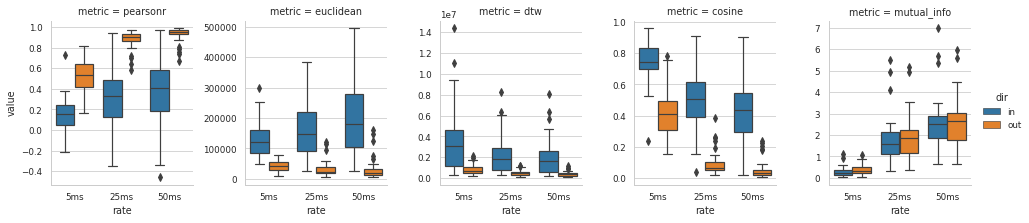

In [27]:
grid = sns.catplot(data=plot_data, x="rate", y="value", hue="dir", col="metric", sharey=False, kind="box", height=3, aspect=0.9)
grid.savefig(plot_file, bbox_inches="tight")